In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

# importlib.reload(package)
%matplotlib inline

In [2]:
iris = pd.read_csv('E:\DATA SETS\Iris\iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


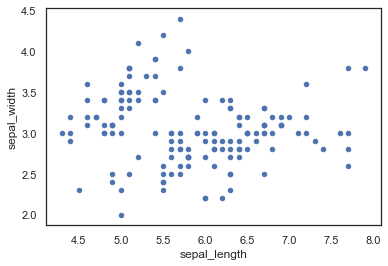

In [6]:
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width')

# Seaborn

## Facet Grid


This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

In [10]:
tips = sns.load_dataset('tips')

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


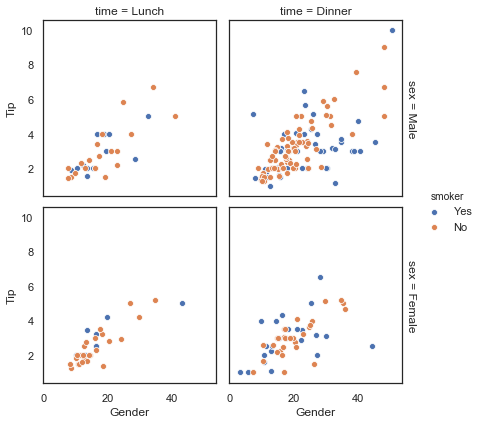

In [43]:
sns.FacetGrid(tips, col = 'time', row = 'sex', hue = 'smoker', margin_titles=True, despine=False) \
.map(sns.scatterplot, "total_bill", 'tip') \
.set_axis_labels('Gender', 'Tip') \
.add_legend()

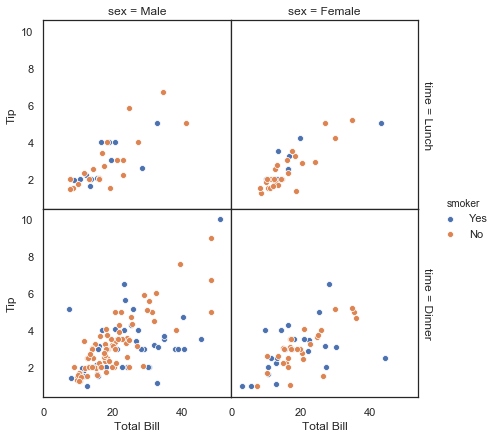

In [50]:
sns.FacetGrid(tips, col = 'sex', row = 'time', margin_titles=True, despine=False, hue = 'smoker') \
.map_dataframe(sns.scatterplot, x = "total_bill", y= 'tip') \
.set_axis_labels('Total Bill', 'Tip') \
.add_legend() \
.fig.subplots_adjust(wspace=0, hspace=0)


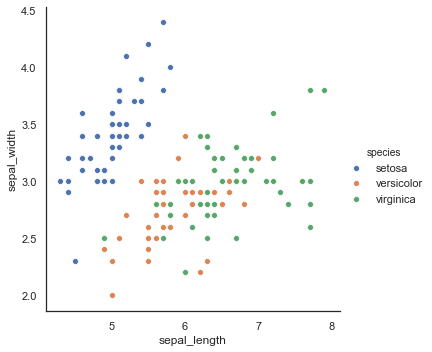

In [16]:
sns.FacetGrid(iris, hue = 'species', size = 5) \
.map(sns.scatterplot, 'sepal_length', 'sepal_width') \
.add_legend()

## Boxplot 

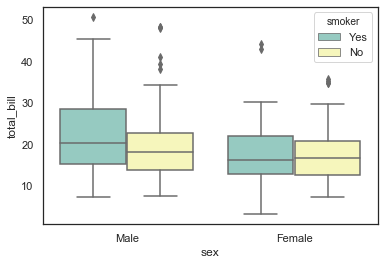

In [116]:
# orient ='h', order=["Female", "Male"]

sns.boxplot(x = 'sex', y= 'total_bill', data = tips, hue="smoker", palette = 'Set3')

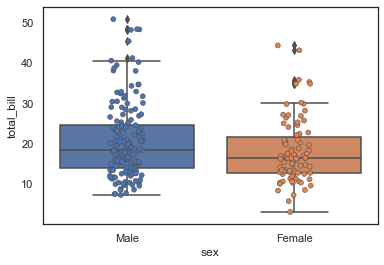

In [110]:
sns.boxplot(x = 'sex', y= 'total_bill', data = tips)
sns.stripplot(x = 'sex', y= 'total_bill', data = tips, jitter =True, edgecolor = 'gray', linewidth=0.5)

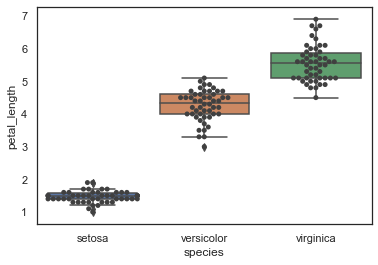

In [7]:
sns.boxplot(x = 'species', y= 'petal_length', data = iris)
sns.swarmplot(x = 'species', y= 'petal_length', data = iris, color ="0.25")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C4AD66208>,
      dtype=object)

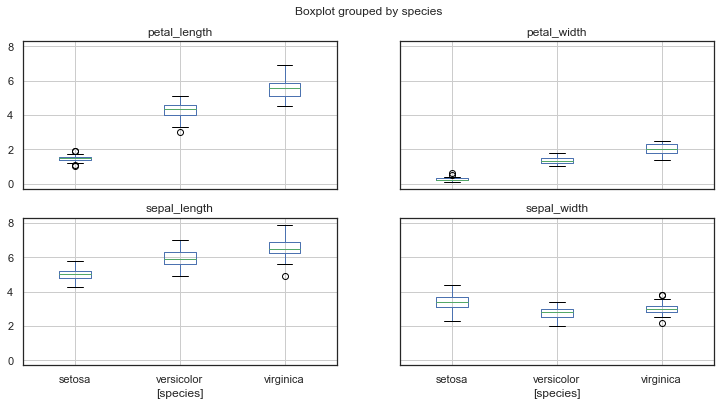

In [153]:
iris.boxplot(by = 'species', figsize= (12, 6))

### Catplot


This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

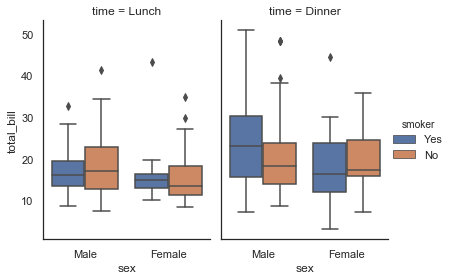

In [82]:
sns.catplot(x='sex', y ='total_bill', 
           hue = 'smoker', col = 'time',
           data = tips, kind = 'box',
           height = 4, aspect =0.7)

## Violin Plot

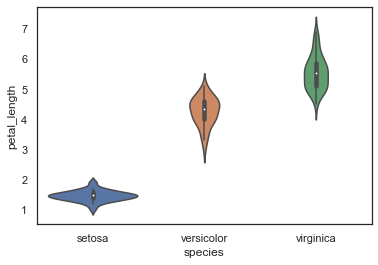

In [118]:
sns.violinplot(x = 'species', y = 'petal_length', data = iris, size = 7)

In [8]:
sns.violinplot(x = 'day', y = 'total_bill', hue = 'smoker', data = tips, 
              split = True, inner = "quart", linewidth=1.5,
               palette={"Yes": "g", "No": ".85"})
sns.despine(left =True)

NameError: name 'tips' is not defined

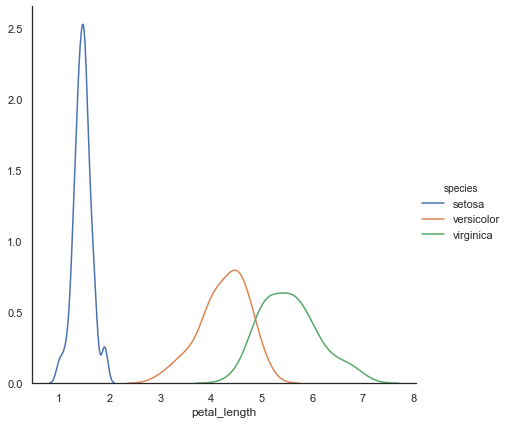

In [138]:
sns.FacetGrid(data = iris, hue = 'species', size =6) \
.map(sns.kdeplot, 'petal_length') \
.add_legend()

## Barplot

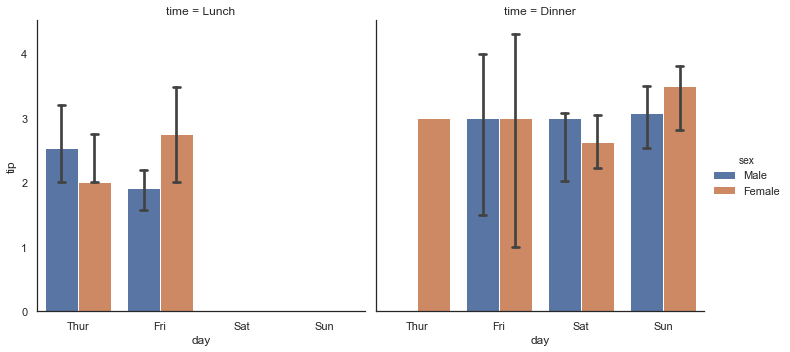

In [11]:
import numpy as np
sns.catplot(x = 'day', y = 'tip', data = tips, hue = 'sex',
           col = 'time', kind = 'bar', estimator = np.median, capsize = 0.08)

In [14]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
# tips['weekend'] =  tips['day'].apply(lambda x: True if x in ('Sat', 'Sun') else False)

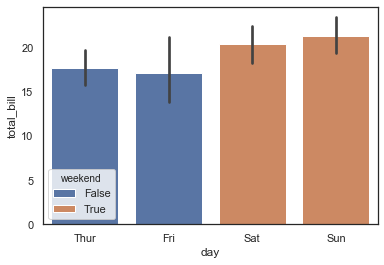

In [15]:
sns.barplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)

## Pairplot

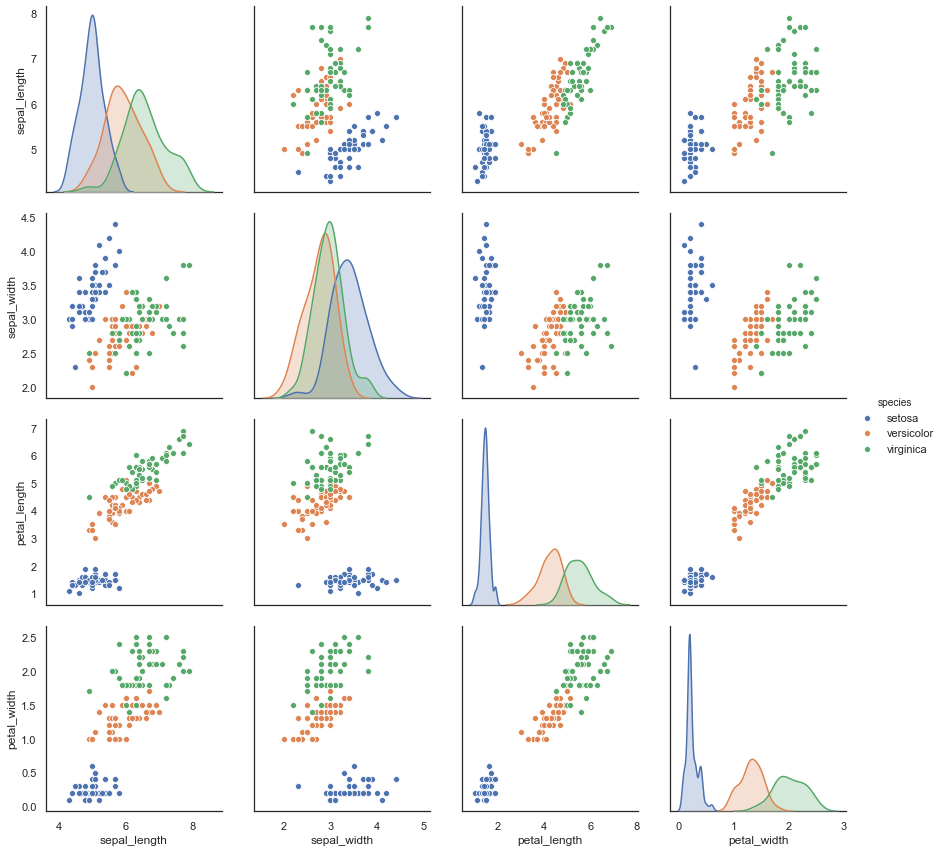

In [148]:
sns.pairplot(iris, hue="species", size=3, diag_kind = 'kde')

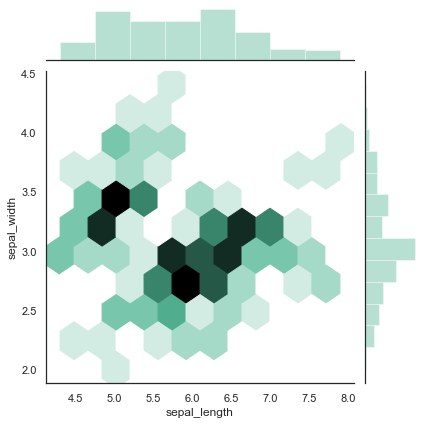

In [14]:
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = iris, size = 6, kind="hex", color="#4CB391")

## Andrews Curve, Parallel coordinates and radviz

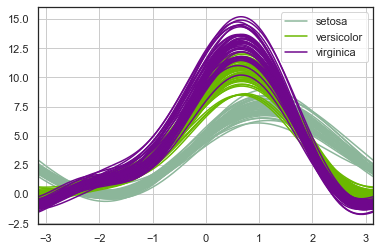

In [158]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(iris, "species")

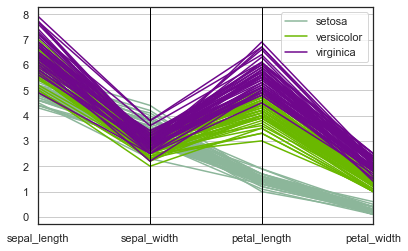

In [157]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species")

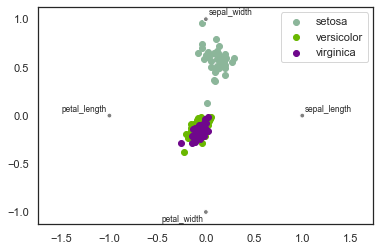

In [155]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(iris, "species")